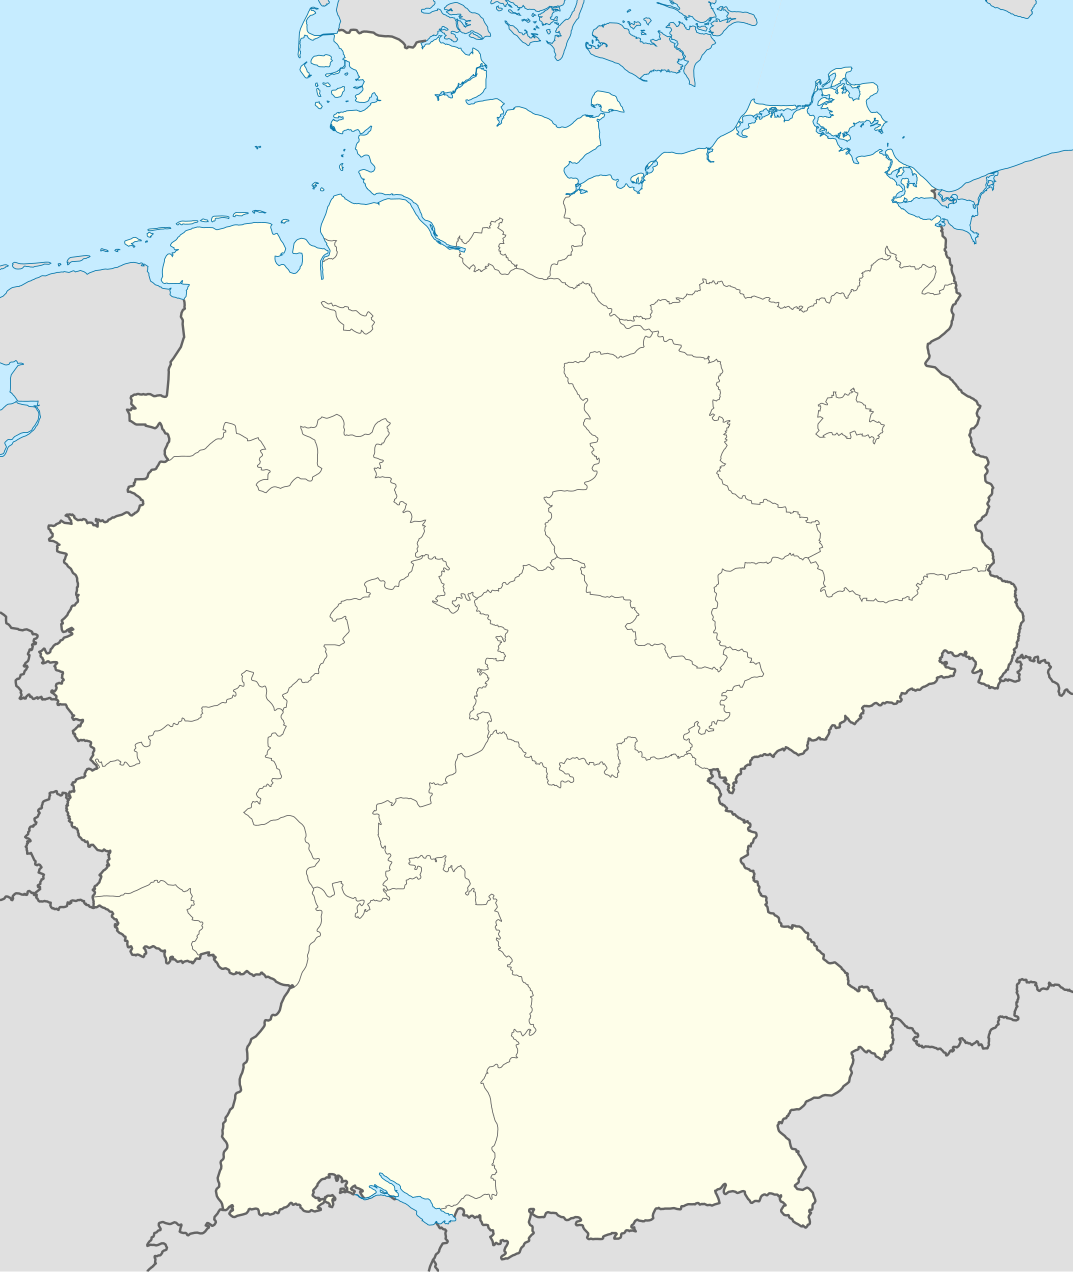

In [5]:
import requests
from IPython.display import Image

url = "https://upload.wikimedia.org/wikipedia/commons/thumb/0/0d/Germany_location_map.svg/1073px-Germany_location_map.svg.png"
response = requests.get(url)

with open("Germany_location_map.png", "wb") as file:
    file.write(response.content)

# https://upload.wikimedia.org/wikipedia/commons/0/0d/Germany_location_map.svg
# Define the coordinate bounds
north = 55.1  # Northern latitude in deg
south = 47.2  # Southern latitude in deg
west = 5.5    # Western longitude in deg
east = 15.5   # Eastern longitude in deg

Image("Germany_location_map.png", width=300)

In [6]:
import pandas as pd
url = 'https://simplemaps.com/static/data/country-cities/de/de.csv'
df = pd.read_csv(url)

# Drop rows where population_proper is NaN
df = df.dropna(subset=['population_proper'])

df

,city,lat,lng,country,iso2,admin_name,capital,population,population_proper
0,Berlin,52.5200,13.4050,Germany,DE,Berlin,primary,4890363.0,3755251.0
1,Stuttgart,48.7775,9.1800,Germany,DE,Baden-Württemberg,admin,2787724.0,632865.0
2,Munich,48.1375,11.5750,Germany,DE,Bavaria,admin,2606021.0,1512491.0
3,Hamburg,53.5500,10.0000,Germany,DE,Hamburg,admin,2484800.0,1892122.0
4,Cologne,50.9364,6.9528,Germany,DE,North Rhine-Westphalia,NaN,1084831.0,1084831.0
...,...,...,...,...,...,...,...,...,...
122,Neulußheim,49.2933,8.5219,Germany,DE,Baden-Württemberg,NaN,7128.0,7128.0
123,Eichwalde,52.3667,13.6167,Germany,DE,Brandenburg,NaN,6475.0,6475.0
124,Altbach,48.7239,9.3797,Germany,DE,Baden-Württemberg,NaN,6422.0,6422.0
125,Merzhausen,47.9664,7.8286,Germany,DE,Baden-Württemberg,NaN,5347.0,5347.0


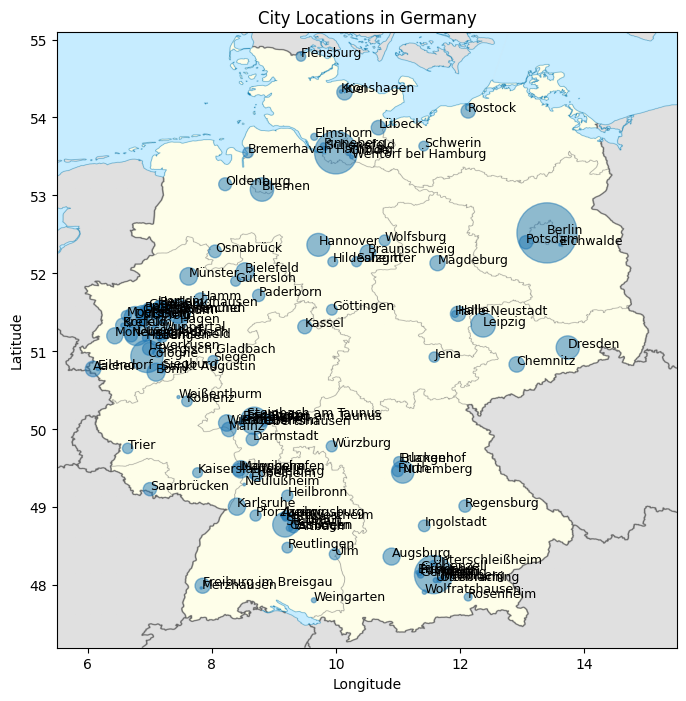

In [7]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg


# Load the base map
base_map = mpimg.imread('Germany_location_map.png')

# Create figure and plot
plt.figure(figsize=(8, 8))
plt.imshow(base_map, extent=[5.5, 15.5, 47.2, 55.1], aspect='auto')

# Plot the cities
plt.scatter(df['lng'], df['lat'], s=0.0005 * df['population_proper'], alpha=0.5)

# Annotate cities
for i, city in enumerate(df['city']):
    plt.text(df['lng'][i], df['lat'][i], city, fontsize=9)

# Set the axis limits to match the specified boundaries
plt.xlim(5.5, 15.5)
plt.ylim(47.2, 55.1)

# Add labels and title
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('City Locations in Germany')

plt.show()

In [8]:
!uv pip install matplotlib

Audited 1 package in 11ms


In [ ]:
import bpy
import mathutils

mesh = bpy.data.meshes.new("PointCloudMesh")
point_obj = bpy.data.objects.new("PointCloud", mesh)
bpy.context.collection.objects.link(point_obj)

In [44]:
offset_x = -8
offset_y = -50
x = df['lng'].values
y = df['lat'].values
z = df['population_proper'].values * 0.0000005

# Update the existing mesh with the new points
points = [mathutils.Vector((xi, yi, zi)) for xi, yi, zi in zip(x, y, z)]
mesh.clear_geometry()  # Clear existing geometry
mesh.from_pydata(points, edges=[], faces=[])
mesh.update()

point_obj.location = (offset_x, offset_y, 0)

In [ ]:
# Calculate the center coordinates of the bounding box
center_x = (west + east) / 2
center_y = (north + south) / 2

map_location = (center_x + offset_x, center_y + offset_y, 0 )
# Add the plane and set it at the calculated center location
bpy.ops.mesh.primitive_plane_add(size=1, location= map_location)
plane = bpy.context.object

# Create a new material and assign the image texture
material = bpy.data.materials.new(name="ImageMaterial")
material.use_nodes = True
bsdf = material.node_tree.nodes["Principled BSDF"]

# Add and load the image texture
tex_image = material.node_tree.nodes.new('ShaderNodeTexImage')
tex_image.image = bpy.data.images.load("Germany_location_map.png")

# Connect the texture to the Base Color of the BSDF shader
material.node_tree.links.new(bsdf.inputs['Base Color'], tex_image.outputs['Color'])
plane.data.materials.append(material)

# Calculate the scale based on the geographic bounds
plane.scale.x = (east - west)
plane.scale.y = (north - south) 